# Statistical Hypothesis Tests in Action!

Author: Suvansh Vaid

Dated: 03/05/2021

## T-test

### 1. Classic T-test (Independent)

The independent t-test is used when we have two unrelated (i.e., independent or unpaired) groups of samples and we need to evaluate whether the means are different (two sided), or one is greater than the other (one-sided). 

It only works if the following assumptions are met: 

* The two groups of samples (A and B), being compared, are normally distributed. This can be checked using __Shapiro-Wilk test__.

* The variances of the two groups are equal. This can be checked using F-test.


The formula for the t-test value is given by: $t=\frac{m_{A}-m_{B}}{\sqrt{\frac{S^{2}}{n_{A}}+\frac{S^{2}}{n_{B}}}}$

where $S^2$ is the estimator of the pooled variance of the 2 groups, given by the formula: 

$S^{2}=\frac{\sum\left(x-m_{A}\right)^{2}+\sum\left(x-m_{B}\right)^{2}}{n_{A}+n_{B}-2}$ with degrees of freedom (df) = $n_{A} + n_{B} - 2$


A special case of this test is when the number of samples in both the groups are equal and we call this test the __Student t-test__, where the formula becomes:

$t=\frac{m_{A}-m_{B}}{S\sqrt{\frac{2}{n}}}$ where 

$S^{2}=\frac{\sum\left(x-m_{A}\right)^{2}+\sum\left(x-m_{B}\right)^{2}}{2n - 2}$ with degrees of freedom (df) = $2n - 2$


### 2. Welch T-test (Independent)

If the variances of the two groups being compared are not equal, we can use the Welch T-test, which is an adaptation of T-test. Here, the Normality assumption is retained however the variances of the two groups may be unequal. The Welch T-test is considered a more safer test as it gives lower scores of t as compared to the classical T-test.  

The formula for Welch T-statistic is given by:
$t=\frac{m_{A}-m_{B}}{\sqrt{\frac{S_{A}^{2}}{n_{A}}+\frac{S_{B}^{2}}{n_{B}}}}$ 

and the degree of freedom (df) is given by: df $=\left(\frac{S_{A}^{2}}{n_{A}}+\frac{S_{B}^{2}}{n_{B}^{2}}\right) /\left(\frac{S_{A}^{4}}{n_{A}^{2}\left(n_{B}-1\right)}+\frac{S_{B}^{4}}{n_{B}^{2}\left(n_{B}-1\right)}\right)$

__How do we interpret the results of the T-test?__

If the p-value is inferior or equal to the significance level 0.05, we can reject the null hypothesis and accept the alternative hypothesis. 

### Example

Suppose we have a body weight dataset with 2 groups which contain the weight of 18 individuals (9 women and 9 men). 
We want to use the t-test to answer whether the average women’s weight differs from the average men’s weight? First, let us prepare the data.

In [2]:
# Data in two numeric vectors
women_weight <- c(38.9, 61.2, 73.3, 21.8, 63.4, 64.6, 48.4, 48.8, 48.5)
men_weight <- c(67.8, 60, 63.4, 76, 89.4, 73.3, 67.3, 61.3, 62.4) 

# Create a data frame
my_data <- data.frame( 
                group = rep(c("Woman", "Man"), each = 9),
                weight = c(women_weight,  men_weight)
                )

head(my_data)

,group,weight
,<chr>,<dbl>
1,Woman,38.9
2,Woman,61.2
3,Woman,73.3
4,Woman,21.8
5,Woman,63.4
6,Woman,64.6


We then check for the assumptions under T-test:

1. Are the two samples independents?
> Yes, the 2 samples are independent. 

2. Does data from both the groups 1 and 2 follow normal distribution?
> To check this assumption, we use the Shapiro-Wilk test as shown below.

In [4]:
# Shapiro-Wilk normality test for Men's weights
with(my_data, shapiro.test(weight[group == "Man"]))

# Shapiro-Wilk normality test for Women's weights
with(my_data, shapiro.test(weight[group == "Woman"])) 


	Shapiro-Wilk normality test

data:  weight[group == "Man"]
W = 0.86425, p-value = 0.1066



	Shapiro-Wilk normality test

data:  weight[group == "Woman"]
W = 0.94266, p-value = 0.6101


We clearly observe quite high p-values (than our significance level 0.05) for both the groups, therefore we cannot reject the null hypothesis that the data are normally distributed. Thus, we can assume the normality. 

3. Do the two populations have the same variances?
> To check this assumption, we could make use of the F-test as shown below.

In [5]:
# We use the var.test function to test for the homogeneity in variances
res.ftest <- var.test(weight ~ group, data = my_data)
res.ftest


	F test to compare two variances

data:  weight by group
F = 0.36134, num df = 8, denom df = 8, p-value = 0.1714
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.08150656 1.60191315
sample estimates:
ratio of variances 
         0.3613398 


The p-value for this F-test comes out to be 0.1714 which is higher than our significance level of 0.05, which essentially means there is no significant difference between the variances of the 2 sets of data.

Thus, we can clearly use the __classic T-test__ here which assumes equal variances. Finally, we conduct the t-test using the function below. 

In [6]:
# Compute t-test
res <- t.test(weight ~ group, data = my_data, var.equal = TRUE)
res


	Two Sample t-test

data:  weight by group
t = 2.7842, df = 16, p-value = 0.01327
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.029759 29.748019
sample estimates:
  mean in group Man mean in group Woman 
           68.98889            52.10000 


#### Test result

The p-value of the test is `0.01327` which is lower than the significance level 0.05, which means we reject the null hypothesis. In conclusion, we can say that the average women’s weight differs from the average men’s weight. 

## Non-Parametric Statistics

### 3. Mann-Whitney U test (Independent)

In some cases, the data may not be distributed normally. This requires what we call a `non-parametric` test such as the Mann-Whitney U test.  Besides the independance or unpaired assumption, this test also assumes that the observations are atleast __Ordinal__ (i.e. they can be relatively ranked). 

This test is conducted by first assigning numeric ranks to all the observations, then calculating the __U score__ for each group using the formula  
$U=R-\frac{n(n+1)}{2}$ and then finally calculating the t-value for the minimum U-score. 


### 4.  Wilcoxon Signed Rank Test (Paired)

So far we made an assumption about the subjects being independant or unpaired, however we may have paired subjects in our experiment. For example, we collect `Age` and `Height` from same participants.

In this case, the formula for t-statistic becomes quite easy: 
$t=\frac{X_{D}}{s_{D} / \sqrt{n}}$ where $X_{D}$ is the mean difference between pairs, $S_{D}$ is the standard deviation of the difference between pairs and n is the number of pairs in total.

The degree of freedom (df) in this case, would be df = n - 1.

### Example

In the same example of weights data as provided above, we now use the Wilcoxon Signed Rank test. 

In [7]:
# compute wilcox.test
res <- wilcox.test(weight ~ group, data = my_data,
                   exact = FALSE)
res


	Wilcoxon rank sum test with continuity correction

data:  weight by group
W = 66, p-value = 0.02712
alternative hypothesis: true location shift is not equal to 0


#### Test result
The p-value of the test is 0.02712, which is less than the significance level alpha = 0.05. We can conclude that men’s median weight is significantly different from women’s median weight with a p-value = 0.02712.

## ANOVA (Analysis of Variance)

This statitical test is an extension of independent two-samples t-test for comparing means in a situation where there are more than two groups. 

The test hypothesis for ANOVA is:
* Null hypothesis $H_{O}$: the means of the different groups are the same.
* Alternative hypothesis $H_{A}$: At least one sample mean is not equal to the others.

There are many variations of ANOVA, however we will cover only the One-way ANOVA here. 

#### One-way ANOVA

In one-way ANOVA, the data is organized into several groups base on one single grouping variable (also called factor variable). 

Following are the steps involved in One-way ANOVA

* Compute the common variance, which is called variance within samples ($S^{2}_{within}$) or residual variance.
* Compute the variance between sample means as follow:
    * Compute the mean of each group
    * Compute the variance between sample means ($S^{2}_{between}$)
* Produce F-statistic as the ratio of $S^{2}_{between}$/$S^{2}_{within}$.

## Example

We will use the default `PlantGrowth` dataset in R here as an example. Let's see what the data is all about!

In [11]:
data  <- PlantGrowth

head(data)

,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl


Well, we can see the data is about the weight measurements of plants for different conditions. Let use check out all the conditions. 

In [10]:
levels(data$group)

[1] "ctrl" "trt1" "trt2"

So we have a control condition and 2 different treatment conditions. Now, we create a random sample from the data using the `sample_n()` function. 

In [23]:
library(dplyr)

sample = sample_n(data, 20)

sample

weight,group
<dbl>,<fct>
5.17,ctrl
4.17,ctrl
5.33,ctrl
4.53,ctrl
4.61,ctrl
6.15,trt2
5.26,trt2
3.59,trt1
5.50,trt2


In [24]:
levels(sample$group)

[1] "ctrl" "trt1" "trt2"

We want to know if there is any significant difference between the average weights of plants in the 3 experimental conditions. So, we can use the R function `aov()` to perform a One-way ANOVA test. 

In [25]:
# Compute the analysis of variance
res.aov <- aov(weight ~ group, data = sample)
# Summary of the analysis
summary(res.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
group        2  3.454  1.7269   4.103 0.0352 *
Residuals   17  7.155  0.4209                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

So, we see that the p-value is less than the significance level of 0.05. Therefore, we can conclude that there are significant differences between the groups. But we don’t know which pairs of groups are different. To find that out, we can use many methods. In this case, we can use the __multiple pairwise-comparison__ to determine if the mean difference between specific pairs of group are statistically significant.

In R, we can use the `TukeyHSD()` function (short for Tukey Honest Significant Differences) for performing multiple pairwise-comparison between the means of groups.

In [26]:
TukeyHSD(res.aov)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = weight ~ group, data = sample)

$group
                diff         lwr       upr     p adj
trt1-ctrl -0.3820000 -1.33080613 0.5668061 0.5669949
trt2-ctrl  0.6657143 -0.19565110 1.5270797 0.1468615
trt2-trt1  1.0477143  0.07319059 2.0222380 0.0341283


It can be seen from the output, that only the difference between trt2 and trt1 is significant with an adjusted p-value of __0.034__.

#### Kruskal-Wallis test

Kruskal-Wallis test by rank is a __non-parametric alternative__ to one-way ANOVA test, which extends the two-samples Wilcoxon test in the situation where there are more than two groups. 

So in the example above, just for the sake of argument, we could assume that the data are not normally distributed.
We use the R function `kruskal.test()` on the data.

In [27]:
kruskal.test(weight ~ group, data = sample)


	Kruskal-Wallis rank sum test

data:  weight by group
Kruskal-Wallis chi-squared = 6.8132, df = 2, p-value = 0.03315


From the result above, the p-value is still less than our significance level of 0.05 which leads us to conclude that there are significant differences between the groups. But we don’t know which pairs of groups are different. To find that out, we use the Multiple pairwise-comparison between groups by using the R-function `pairwise.wilcox.test()`. 

In [28]:
pairwise.wilcox.test(sample$weight, sample$group,
                 p.adjust.method = "BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  sample$weight and sample$group 

     ctrl  trt1 
trt1 0.305 -    
trt2 0.072 0.072

P value adjustment method: BH 

So we see that each p-value is higher in this case than the significance level of 0.05. However, lets see if increasing the sample size makes things any different. 

In [29]:
sample = sample_n(data, 30)

In [30]:
pairwise.wilcox.test(sample$weight, sample$group,
                 p.adjust.method = "BH")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  sample$weight and sample$group 

     ctrl  trt1 
trt1 0.199 -    
trt2 0.095 0.027

P value adjustment method: BH 

Here, we see that with a sample size of 30, the Wilcox test is able to identify a statistical difference between trt1 and trt2. 

## Conclusion

At the end, I would like to say that the tests we observed above are just the tip of the iceberg and there are many more important statisitical hypothesis tests, however the ones we covered are commonly used. 

Also, I find it intimidating at times to select a test for my analysis, so I've shared below a __cheat sheet__  that I found to be quite useful and also some reference links for further dive into the world of hypothesis testing. 

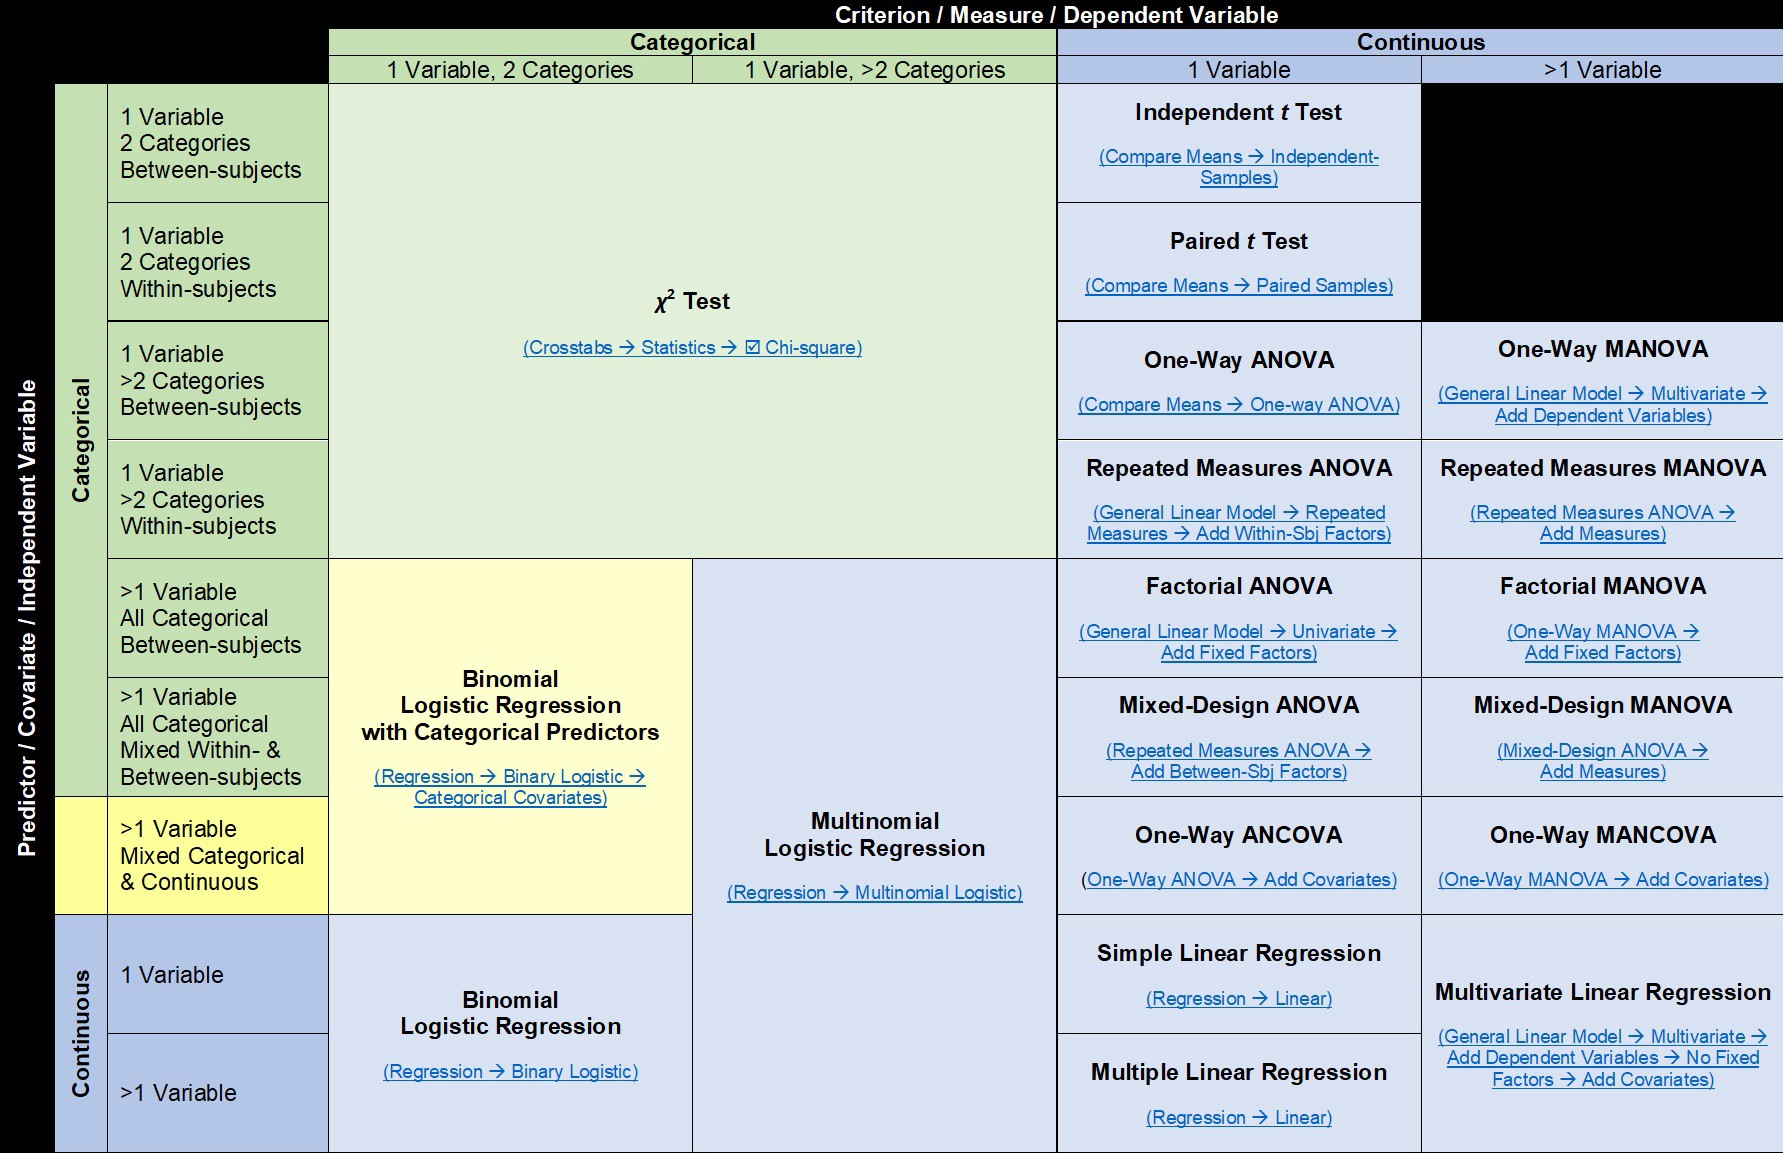

## References

1. https://towardsdatascience.com/demystifying-statistical-analysis-1-a-handy-cheat-sheet-b6229bf992cf)
2. http://www.sthda.com/english/wiki/unpaired-two-samples-t-test-in-r
3. http://www.sthda.com/english/wiki/wiki.php?id_contents=7387
4. http://www.sthda.com/english/wiki/two-way-anova-test-in-r
5. http://www.sthda.com/english/wiki/kruskal-wallis-test-in-r
6. https://machinelearningmastery.com/statistical-hypothesis-tests/